In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import random
from numpy.linalg import eig

### General Setup:
- $A_{i,i+1}$ : matrices which represent each bus stop
    - given the state of bus stop i, what is the probability p of the state of bus stop i+1
- A : block matrix which represents one full bus route

<img src="./Capture.jpg" width=700 height=700 />

### Function: Simulate multiple full bus routes to track probability of end state

In [2]:
def full_route_count(A):
    start_vec = np.zeros((1,33))
    #given that stop 1 was on time
    start_vec[:,1] = 1  

    #data for countplot
    end_state_data = []

    #10,000 simulations
    for i in range(10000):

        #state vector of stop 1 after full route
        end_vec = start_vec @ A @ A @ A @ A @ A @ A @ A @ A @ A @ A @ A  
        #choose end state according to resulting probabilites
        end_state = random.choices(['early', 'on time', 'late'], weights=(end_vec[0,0], end_vec[0,1], end_vec[0,2]))
        #record data for countplot
        end_state_data.append(end_state[0]) 
    
    return end_state_data

### Function: Find stationary distribution of A11

In [3]:
def get_stationary(A12, A23, A34, A45, A56, A67, A78, A89, A910, A1011, A111):

    #transition matrix for this purpose
    A11 = A12 @ A23 @ A34 @ A45 @ A56 @ A67 @ A78 @ A89 @ A910 @ A1011 @ A111

    #need to find left eigvecs of transition matrix A11
    #but np.linalg.eig only finds right eigvecs, so we use transpose A11 instead 
    evals, evecs = eig(A11.T)
    #get eigvec with eigval 1
    evec1 = evecs[:,np.isclose(evals, 1)]
    evec1 = evec1[:,0]
    #normalize vector
    stationary = evec1 / evec1.sum()
    print(stationary)

### Function: Record state of every stop, for multiple full route simulations

In [4]:
def each_stop_count(A12, A23, A34, A45, A56, A67, A78, A89, A910, A1011, A111):

    num_routes = 10000
    
    #data for countplot    
    #stop_state_data = pd.DataFrame(np.zeros((11,3)), columns=['early','on time','late'])
    stop_state_data = pd.DataFrame(np.zeros((11*num_routes,2)), columns=['Stop', 'State'])
    stop_state_data['Stop'] = stop_state_data['Stop'].astype(int)
    stop_state_data['State'] = stop_state_data['State'].astype(str)

    #10000 simulations of full routes
    data_row = 0
    for i in range(num_routes):
        #reset variables
        stop = 2  #stop '12' = stop 1
        state_vec = np.zeros((1,3))
        #given that stop 1 was on time
        state_vec[:,1] = 1

        #for each full route, record state after each bus stop
        for trans_mat in [A12, A23, A34, A45, A56, A67, A78, A89, A910, A1011, A111]:
            #state vector after one stop
            state_vec = state_vec @ trans_mat 
            #choose end state according to resulting probabilites
            end_state = random.choices(['early', 'on time', 'late'], weights=(state_vec[0,0], state_vec[0,1], state_vec[0,2]))
            #record data for countplot
            stop_state_data.at[data_row, 'Stop'] = stop
            stop_state_data.at[data_row, 'State'] = end_state[0]
            stop = stop + 1
            data_row = data_row + 1

    #set stop '12' to correct bus stop number: stop 1
    stop_state_data.loc[(stop_state_data['Stop'] == 12), 'Stop'] = 1
    
    return stop_state_data

## Question 1: What does the timeliness of the bus's full route and individual stops look like when we alter the probabilities in the transition matrix?

**Note: For this question, we will only be looking at symmetric matrices.**

### Scenario 1:
$A_{i,i+1}$ = $\begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$ 

**Set up matrices:**

In [5]:
#each bus stop
A12 = A23 = A34 = A45 = A56 = A67 = A78 = A89 = A910 = A1011 = A111 = np.array([[1,0,0], 
                                                                                [0,1,0], 
                                                                                [0,0,1]])
#full bus route
m0 = np.zeros((3,3))
A = np.block([[m0,A12,m0,m0,m0,m0,m0,m0,m0,m0,m0], 
              [m0,m0,A23,m0,m0,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,A34,m0,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,A45,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,A56,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,A67,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,A78,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,A89,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,m0,A910,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,m0,m0,A1011], 
              [A111,m0,m0,m0,m0,m0,m0,m0,m0,m0,m0]])

**Simulate multiple full bus routes and create countplot:**

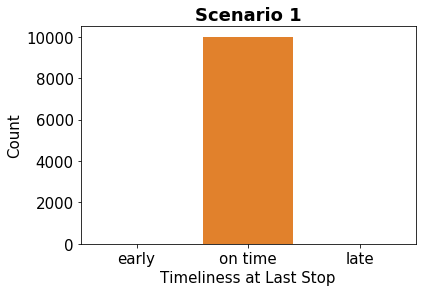

In [6]:
#call function
end_state_data = full_route_count(A)

#countplot
p = sns.countplot(end_state_data, order=['early', 'on time', 'late'])
p.axes.set_title('Scenario 1', fontsize=18, fontweight='bold')
p.set_xlabel('Timeliness at Last Stop',fontsize=15)
p.set_ylabel('Count',fontsize=15)
p.tick_params(labelsize=15)

plt.savefig('q1s1f1', bbox_inches='tight')
plt.show()

Given the transition matrix probabilities for Scenario 1, the bus will always return to stop 1 on time.

**Find Stationary Distribution of A11:**

In [7]:
#call function
get_stationary(A12, A23, A34, A45, A56, A67, A78, A89, A910, A1011, A111)

[1. 0. 0.]


Since the 3x3 matrix A11 equals the identity matrix, there are numerous eigenvectors with eigenvalue 1, giving rise to numerous associated stationary distributions. Hence, it does not make sense to discuss the stationary distribution in this scenario.

**Find states of each stop for simulations of many full routes:**

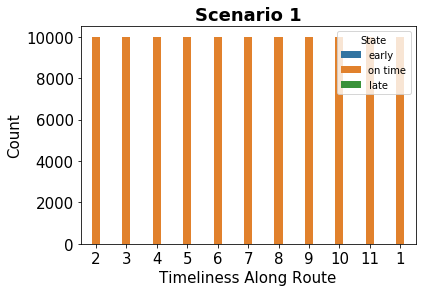

In [8]:
#call function
stop_state_data = each_stop_count(A12, A23, A34, A45, A56, A67, A78, A89, A910, A1011, A111)

#countplot
p = sns.countplot(x='Stop', hue='State', data=stop_state_data, order=[2,3,4,5,6,7,8,9,10,11,1], 
                  hue_order=['early','on time','late'])
p.axes.set_title('Scenario 1', fontsize=18, fontweight='bold')
p.set_xlabel('Timeliness Along Route',fontsize=15)
p.set_ylabel('Count',fontsize=15)
p.tick_params(labelsize=15)

plt.savefig('q1s1f3', bbox_inches='tight')
plt.show()

### Scenario 2:
$A_{i,i+1}$ = $\begin{bmatrix} .9 & .05 & .05 \\ .05 & .9 & .05 \\ .05 & .05 & .9 \end{bmatrix}$ 

**Set up matrices:**

In [9]:
#each bus stop
A12 = A23 = A34 = A45 = A56 = A67 = A78 = A89 = A910 = A1011 = A111 = np.array([[.9,.05,.05], 
                                                                                [.05,.9,.05], 
                                                                                [.05,.05,.9]])
#full bus route
m0 = np.zeros((3,3))
A = np.block([[m0,A12,m0,m0,m0,m0,m0,m0,m0,m0,m0], 
              [m0,m0,A23,m0,m0,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,A34,m0,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,A45,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,A56,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,A67,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,A78,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,A89,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,m0,A910,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,m0,m0,A1011], 
              [A111,m0,m0,m0,m0,m0,m0,m0,m0,m0,m0]])

**Simulate multiple full bus routes and create countplot:**

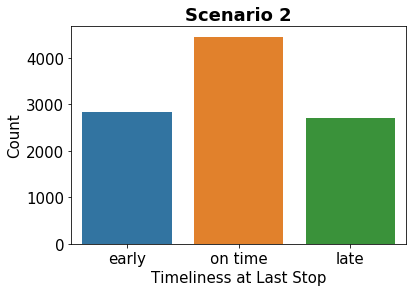

In [10]:
#call function
end_state_data = full_route_count(A)

#countplot
p = sns.countplot(end_state_data, order=['early', 'on time', 'late'])
p.axes.set_title('Scenario 2', fontsize=18, fontweight='bold')
p.set_xlabel('Timeliness at Last Stop',fontsize=15)
p.set_ylabel('Count',fontsize=15)
p.tick_params(labelsize=15)

plt.savefig('q1s2f1', bbox_inches='tight')
plt.show()

Given the transition matrix probabilities for Scenario 2, there is (about) an equal probability that the bus will return to stop 1 either early or late, and a higher probability that it will return on time.

**Find Stationary Distribution of A11:**

In [11]:
#call function
get_stationary(A12, A23, A34, A45, A56, A67, A78, A89, A910, A1011, A111)

[0.33333333 0.33333333 0.33333333]


As time progresses, the probability distribution of early = .333, on time = .333, and late = .333, remains unchanged in the Markov chain.

**Find states of each stop for simulations of many full routes:**

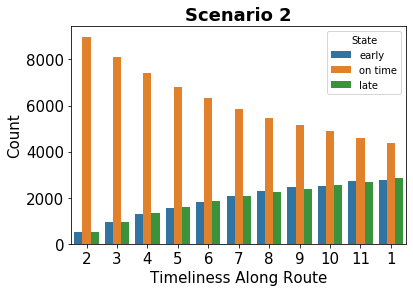

In [12]:
#call function
stop_state_data = each_stop_count(A12, A23, A34, A45, A56, A67, A78, A89, A910, A1011, A111)

#countplot
p = sns.countplot(x='Stop', hue='State', data=stop_state_data, order=[2,3,4,5,6,7,8,9,10,11,1], 
                  hue_order=['early','on time','late'])
p.axes.set_title('Scenario 2', fontsize=18, fontweight='bold')
p.set_xlabel('Timeliness Along Route',fontsize=15)
p.set_ylabel('Count',fontsize=15)
p.tick_params(labelsize=15)

plt.savefig('q1s2f3', bbox_inches='tight')
plt.show()

### Scenario 3:
$A_{i,i+1}$ = $\begin{bmatrix} .8 & .1 & .1 \\ .1 & .8 & .1 \\ .1 & .1 & .8 \end{bmatrix}$ 

**Set up matrices:**

In [13]:
#each bus stop
A12 = A23 = A34 = A45 = A56 = A67 = A78 = A89 = A910 = A1011 = A111 = np.array([[.8,.1,.1], 
                                                                                [.1,.8,.1], 
                                                                                [.1,.1,.8]])
#full bus route
m0 = np.zeros((3,3))
A = np.block([[m0,A12,m0,m0,m0,m0,m0,m0,m0,m0,m0], 
              [m0,m0,A23,m0,m0,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,A34,m0,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,A45,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,A56,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,A67,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,A78,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,A89,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,m0,A910,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,m0,m0,A1011], 
              [A111,m0,m0,m0,m0,m0,m0,m0,m0,m0,m0]])

**Simulate multiple full bus routes and create countplot:**

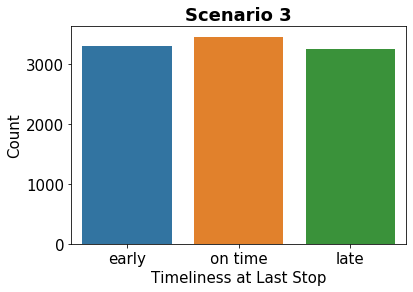

In [14]:
#call function
end_state_data = full_route_count(A)

#countplot
p = sns.countplot(end_state_data, order=['early', 'on time', 'late'])
p.axes.set_title('Scenario 3', fontsize=18, fontweight='bold')
p.set_xlabel('Timeliness at Last Stop',fontsize=15)
p.set_ylabel('Count',fontsize=15)
p.tick_params(labelsize=15)

plt.savefig('q1s3f1', bbox_inches='tight')
plt.show()

Given the transition matrix probabilities for Scenario 3, there is (about) an equal probability that the bus will return to stop 1 early, on time, or late.

**Find Stationary Distribution of A11:**

In [15]:
#call function
get_stationary(A12, A23, A34, A45, A56, A67, A78, A89, A910, A1011, A111)

[0.33333333 0.33333333 0.33333333]


As time progresses, the probability distribution of early = .333, on time = .333, and late = .333, remains unchanged in the Markov chain.

**Find states of each stop for simulations of many full routes:**

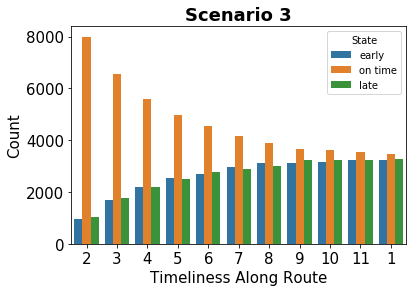

In [16]:
#call function
stop_state_data = each_stop_count(A12, A23, A34, A45, A56, A67, A78, A89, A910, A1011, A111)

#countplot
p = sns.countplot(x='Stop', hue='State', data=stop_state_data, order=[2,3,4,5,6,7,8,9,10,11,1], 
                  hue_order=['early','on time','late'])
p.axes.set_title('Scenario 3', fontsize=18, fontweight='bold')
p.set_xlabel('Timeliness Along Route',fontsize=15)
p.set_ylabel('Count',fontsize=15)
p.tick_params(labelsize=15)

plt.savefig('q1s3f3', bbox_inches='tight')
plt.show()

### Scenario 4:
$A_{i,i+1}$ = $\begin{bmatrix} .7 & .15 & .15 \\ .15 & .7 & .15 \\ .15 & .15 & .7 \end{bmatrix}$ 

**Set up matrices:**

In [17]:
#each bus stop
A12 = A23 = A34 = A45 = A56 = A67 = A78 = A89 = A910 = A1011 = A111 = np.array([[.7,.15,.15], 
                                                                                [.15,.7,.15], 
                                                                                [.15,.15,.7]])
#full bus route
m0 = np.zeros((3,3))
A = np.block([[m0,A12,m0,m0,m0,m0,m0,m0,m0,m0,m0], 
              [m0,m0,A23,m0,m0,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,A34,m0,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,A45,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,A56,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,A67,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,A78,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,A89,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,m0,A910,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,m0,m0,A1011], 
              [A111,m0,m0,m0,m0,m0,m0,m0,m0,m0,m0]])

**Simulate multiple full bus routes and create countplot:**

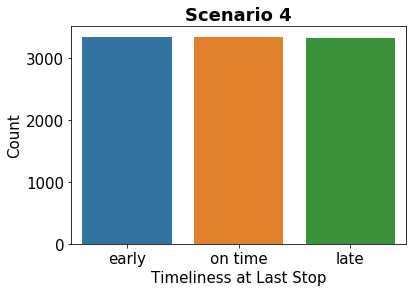

In [18]:
#call function
end_state_data = full_route_count(A)

#countplot
p = sns.countplot(end_state_data, order=['early', 'on time', 'late'])
p.axes.set_title('Scenario 4', fontsize=18, fontweight='bold')
p.set_xlabel('Timeliness at Last Stop',fontsize=15)
p.set_ylabel('Count',fontsize=15)
p.tick_params(labelsize=15)

plt.savefig('q1s4f1', bbox_inches='tight')
plt.show()

Given the transition matrix probabilities for Scenario 4, there is (about) an equal probability that the bus will return to stop 1 early, on time, or late.

**Find Stationary Distribution of A11:**

In [19]:
#call function
get_stationary(A12, A23, A34, A45, A56, A67, A78, A89, A910, A1011, A111)

[0.33333333 0.33333333 0.33333333]


As time progresses, the probability distribution of early = .333, on time = .333, and late = .333, remains unchanged in the Markov chain.

**Find states of each stop for simulations of many full routes:**

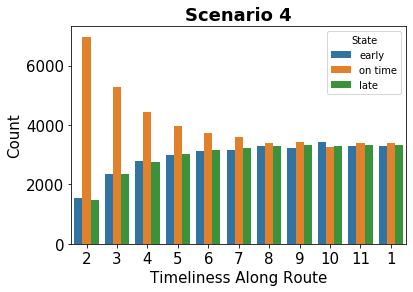

In [20]:
#call function
stop_state_data = each_stop_count(A12, A23, A34, A45, A56, A67, A78, A89, A910, A1011, A111)

#countplot
p = sns.countplot(x='Stop', hue='State', data=stop_state_data, order=[2,3,4,5,6,7,8,9,10,11,1], 
                  hue_order=['early','on time','late'])
p.axes.set_title('Scenario 4', fontsize=18, fontweight='bold')
p.set_xlabel('Timeliness Along Route',fontsize=15)
p.set_ylabel('Count',fontsize=15)
p.tick_params(labelsize=15)

plt.savefig('q1s4f3', bbox_inches='tight')
plt.show()

### Scenario 5:
$A_{i,i+1}$ = $\begin{bmatrix} .6 & .2 & .2 \\ .2 & .6 & .2 \\ .2 & .2 & .6 \end{bmatrix}$ 

**Set up matrices:**

In [21]:
#each bus stop
A12 = A23 = A34 = A45 = A56 = A67 = A78 = A89 = A910 = A1011 = A111 = np.array([[.6,.2,.2], 
                                                                                [.2,.6,.2], 
                                                                                [.2,.2,.6]])
#full bus route
m0 = np.zeros((3,3))
A = np.block([[m0,A12,m0,m0,m0,m0,m0,m0,m0,m0,m0], 
              [m0,m0,A23,m0,m0,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,A34,m0,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,A45,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,A56,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,A67,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,A78,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,A89,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,m0,A910,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,m0,m0,A1011], 
              [A111,m0,m0,m0,m0,m0,m0,m0,m0,m0,m0]])

**Simulate multiple full bus routes and create countplot:**

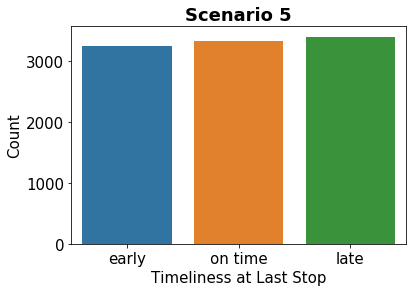

In [22]:
#call function
end_state_data = full_route_count(A)

#countplot
p = sns.countplot(end_state_data, order=['early', 'on time', 'late'])
p.axes.set_title('Scenario 5', fontsize=18, fontweight='bold')
p.set_xlabel('Timeliness at Last Stop',fontsize=15)
p.set_ylabel('Count',fontsize=15)
p.tick_params(labelsize=15)

plt.savefig('q1s5f1', bbox_inches='tight')
plt.show()

Given the transition matrix probabilities for Scenario 5, there is (about) an equal probability that the bus will return to stop 1 early, on time, or late.

**Find Stationary Distribution of A11:**

In [23]:
#call function
get_stationary(A12, A23, A34, A45, A56, A67, A78, A89, A910, A1011, A111)

[0.33333333 0.33333333 0.33333333]


As time progresses, the probability distribution of early = .333, on time = .333, and late = .333, remains unchanged in the Markov chain.

**Find states of each stop for simulations of many full routes:**

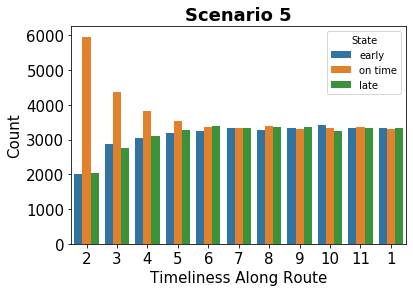

In [24]:
#call function
stop_state_data = each_stop_count(A12, A23, A34, A45, A56, A67, A78, A89, A910, A1011, A111)

#countplot
p = sns.countplot(x='Stop', hue='State', data=stop_state_data, order=[2,3,4,5,6,7,8,9,10,11,1], 
                  hue_order=['early','on time','late'])
p.axes.set_title('Scenario 5', fontsize=18, fontweight='bold')
p.set_xlabel('Timeliness Along Route',fontsize=15)
p.set_ylabel('Count',fontsize=15)
p.tick_params(labelsize=15)

plt.savefig('q1s5f3', bbox_inches='tight')
plt.show()

### Scenario 6:
$A_{i,i+1}$ = $\begin{bmatrix} .5 & .25 & .25 \\ .25 & .5 & .25 \\ .25 & .25 & .5 \end{bmatrix}$ 

**Set up matrices:**

In [25]:
#each bus stop
A12 = A23 = A34 = A45 = A56 = A67 = A78 = A89 = A910 = A1011 = A111 = np.array([[.5,.25,.25], 
                                                                                [.25,.5,.25], 
                                                                                [.25,.25,.5]])
#full bus route
m0 = np.zeros((3,3))
A = np.block([[m0,A12,m0,m0,m0,m0,m0,m0,m0,m0,m0], 
              [m0,m0,A23,m0,m0,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,A34,m0,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,A45,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,A56,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,A67,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,A78,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,A89,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,m0,A910,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,m0,m0,A1011], 
              [A111,m0,m0,m0,m0,m0,m0,m0,m0,m0,m0]])

**Simulate multiple full bus routes and create countplot:**

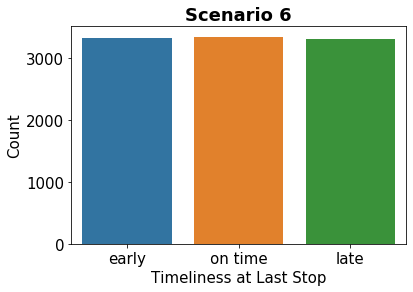

In [26]:
#call function
end_state_data = full_route_count(A)

#countplot
p = sns.countplot(end_state_data, order=['early', 'on time', 'late'])
p.axes.set_title('Scenario 6', fontsize=18, fontweight='bold')
p.set_xlabel('Timeliness at Last Stop',fontsize=15)
p.set_ylabel('Count',fontsize=15)
p.tick_params(labelsize=15)

plt.savefig('q1s6f1', bbox_inches='tight')
plt.show()

Given the transition matrix probabilities for Scenario 6, there is (about) an equal probability that the bus will return to stop 1 either early, on time, or late.

**Find Stationary Distribution of A11:**

In [27]:
#call function
get_stationary(A12, A23, A34, A45, A56, A67, A78, A89, A910, A1011, A111)

[0.33333333 0.33333333 0.33333333]


As time progresses, the probability distribution of early = .333, on time = .333, and late = .333, remains unchanged in the Markov chain.

**Find states of each stop for simulations of many full routes:**

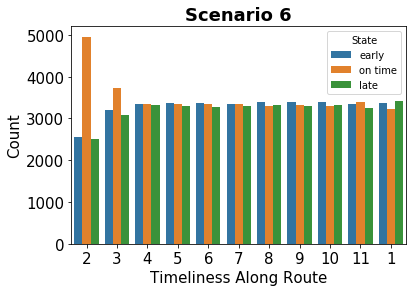

In [28]:
#call function
stop_state_data = each_stop_count(A12, A23, A34, A45, A56, A67, A78, A89, A910, A1011, A111)

#countplot
p = sns.countplot(x='Stop', hue='State', data=stop_state_data, order=[2,3,4,5,6,7,8,9,10,11,1], 
                  hue_order=['early','on time','late'])
p.axes.set_title('Scenario 6', fontsize=18, fontweight='bold')
p.set_xlabel('Timeliness Along Route',fontsize=15)
p.set_ylabel('Count',fontsize=15)
p.tick_params(labelsize=15)

plt.savefig('q1s6f3', bbox_inches='tight')
plt.show()

### Scenario 7:
$A_{i,i+1}$ = $\begin{bmatrix} .4 & .3 & .3 \\ .3 & .4 & .3 \\ .3 & .3 & .4 \end{bmatrix}$ 

**Set up matrices:**

In [29]:
#each bus stop
A12 = A23 = A34 = A45 = A56 = A67 = A78 = A89 = A910 = A1011 = A111 = np.array([[.4,.3,.3], 
                                                                                [.3,.4,.3], 
                                                                                [.3,.3,.4]])
#full bus route
m0 = np.zeros((3,3))
A = np.block([[m0,A12,m0,m0,m0,m0,m0,m0,m0,m0,m0], 
              [m0,m0,A23,m0,m0,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,A34,m0,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,A45,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,A56,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,A67,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,A78,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,A89,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,m0,A910,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,m0,m0,A1011], 
              [A111,m0,m0,m0,m0,m0,m0,m0,m0,m0,m0]])

**Simulate multiple full bus routes and create countplot:**

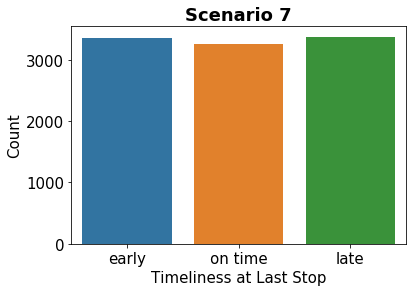

In [30]:
#call function
end_state_data = full_route_count(A)

#countplot
p = sns.countplot(end_state_data, order=['early', 'on time', 'late'])
p.axes.set_title('Scenario 7', fontsize=18, fontweight='bold')
p.set_xlabel('Timeliness at Last Stop',fontsize=15)
p.set_ylabel('Count',fontsize=15)
p.tick_params(labelsize=15)

plt.savefig('q1s7f1', bbox_inches='tight')
plt.show()

Given the transition matrix probabilities for Scenario 7, there is (about) an equal probability that the bus will return to stop 1 early, on time, or late.

**Find Stationary Distribution of A11:**

In [31]:
#call function
get_stationary(A12, A23, A34, A45, A56, A67, A78, A89, A910, A1011, A111)

[0.33333333 0.33333333 0.33333333]


As time progresses, the probability distribution of early = .333, on time = .333, and late = .333, remains unchanged in the Markov chain.

**Find states of each stop for simulations of many full routes:**

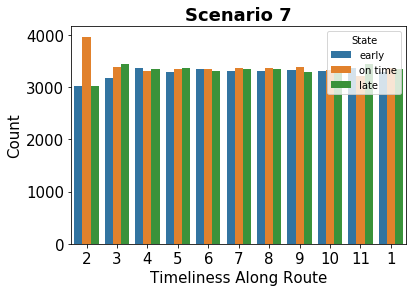

In [32]:
#call function
stop_state_data = each_stop_count(A12, A23, A34, A45, A56, A67, A78, A89, A910, A1011, A111)

#countplot
p = sns.countplot(x='Stop', hue='State', data=stop_state_data, order=[2,3,4,5,6,7,8,9,10,11,1], 
                  hue_order=['early','on time','late'])
p.axes.set_title('Scenario 7', fontsize=18, fontweight='bold')
p.set_xlabel('Timeliness Along Route',fontsize=15)
p.set_ylabel('Count',fontsize=15)
p.tick_params(labelsize=15)

plt.savefig('q1s7f3', bbox_inches='tight')
plt.show()

## Conclusion to Q1:
As the probabilites of the 3 different states (early, on time, or late) become closer in value, more and more bus stops on the route have equal probabiity of being early, on time, or late. The farther the values of the transition matrix are, the longer the bus will stay 'mostly' on time.

## Question 2: How late can stop 3 and 4 be (where most students board), so that the bus still arrives on time at stop 8 (school)?

**For this question, we will focus on a subset of the full route: Stop 2 - Stop 8. We will vary the transition matrices for stop 3 to 4 and stop 4 to 5, while keeping the rest fixed. This way, we will see how the timeliness of stop 3 and 4 affects if the passengers arrive to school on time.**

**Since the bus's state at stop 1 is already given, the first stop affected by the transition matrix is stop 2. Stop 3 and stop 4 are the busiest stops for students boarding the bus to get to school. Hence, we will emphasize that when creating the transition matrix for stop 3 and 4 (by increasing the probability of being late, and never being early). The rest of the transition matrices (1 to 2, 2 to 3, 5 to 6, 6 to 7, and 7 to 8) will have fixed probabilities that favor being on time (there will be 0% chance of early since an early bus will wait and automatically count as on time).**

**The fixed transition matrix was created so that each state has an 80% chance of remaining in that state for the next bus stop, and a 20% chance of switching states:**
$A_{i,i+1}$ = $\begin{bmatrix} .8 & .2 & 0 \\ .1 & .8 & .1 \\ 0 & .2 & .8 \end{bmatrix}$ 

**However, since we will count 'early' as 'on time,' we combine those 2 probabilities into the 'on time' category:**
$A_{i,i+1}$ = $\begin{bmatrix} 0 & 1 & 0 \\ 0 & .9 & .1 \\ 0 & .2 & .8 \end{bmatrix}$ 

### Scenario 1:
$A_{i,i+1}$ = $\begin{bmatrix} 0 & 1 & 0 \\ 0 & .9 & .1 \\ 0 & .2 & .8 \end{bmatrix}$ 

EXCEPT

$A_{3,4}$ = $A_{4,5}$ = $\begin{bmatrix} 0 & .1 & .9 \\ 0 & .1 & .9 \\ 0 & .1 & .9 \end{bmatrix}$ 

**Set up matrices:**

In [35]:
#each bus stop
A34 = A45 = np.array([[0,.1,.9], 
                      [0,.1,.9], 
                      [0,.1,.9]])
A12 = A23 = A56 = A67 = A78 = A89 = A910 = A1011 = A111 = np.array(([[0,1,0], 
                                                                     [0,.9,.1], 
                                                                     [0,.2,.8]]))
#full bus route
m0 = np.zeros((3,3))
A = np.block([[m0,A12,m0,m0,m0,m0,m0,m0,m0,m0,m0], 
              [m0,m0,A23,m0,m0,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,A34,m0,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,A45,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,A56,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,A67,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,A78,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,A89,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,m0,A910,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,m0,m0,A1011], 
              [A111,m0,m0,m0,m0,m0,m0,m0,m0,m0,m0]])

**Find states of each stop for simulations of many full routes:**

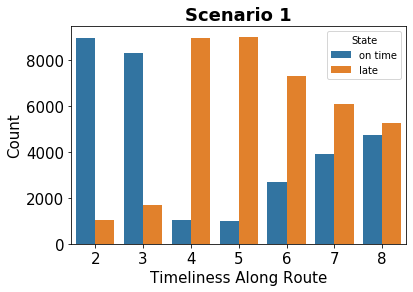

In [36]:
#call function
stop_state_data = each_stop_count(A12, A23, A34, A45, A56, A67, A78, A89, A910, A1011, A111)

#only show stops 2-8
stop_state_data = stop_state_data[stop_state_data.Stop.isin([2,3,4,5,6,7,8])]

#countplot
p = sns.countplot(x='Stop', hue='State', data=stop_state_data, order=[2,3,4,5,6,7,8], hue_order=['on time','late'])
p.axes.set_title('Scenario 1', fontsize=18, fontweight='bold')
p.set_xlabel('Timeliness Along Route',fontsize=15)
p.set_ylabel('Count',fontsize=15)
p.tick_params(labelsize=15)

plt.savefig('q2s1', bbox_inches='tight')
plt.show()

### Scenario 2:
$A_{i,i+1}$ = $\begin{bmatrix} 0 & 1 & 0 \\ 0 & .9 & .1 \\ 0 & .2 & .8 \end{bmatrix}$ 

EXCEPT

$A_{3,4}$ = $A_{4,5}$ = $\begin{bmatrix} 0 & .2 & .8 \\ 0 & .2 & .8 \\ 0 & .2 & .8 \end{bmatrix}$ 

**Set up matrices:**

In [37]:
#each bus stop
A34 = A45 = np.array([[0,.2,.8], 
                      [0,.2,.8], 
                      [0,.2,.8]])
A12 = A23 = A56 = A67 = A78 = A89 = A910 = A1011 = A111 = np.array(([[0,1,0], 
                                                                     [0,.9,.1], 
                                                                     [0,.2,.8]]))
#full bus route
m0 = np.zeros((3,3))
A = np.block([[m0,A12,m0,m0,m0,m0,m0,m0,m0,m0,m0], 
              [m0,m0,A23,m0,m0,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,A34,m0,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,A45,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,A56,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,A67,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,A78,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,A89,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,m0,A910,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,m0,m0,A1011], 
              [A111,m0,m0,m0,m0,m0,m0,m0,m0,m0,m0]])

**Find states of each stop for simulations of many full routes:**

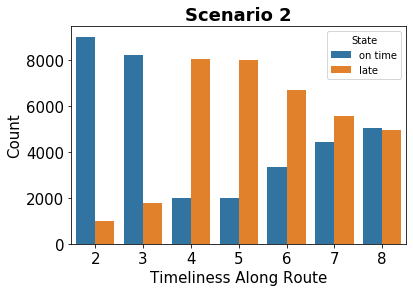

In [38]:
#call function
stop_state_data = each_stop_count(A12, A23, A34, A45, A56, A67, A78, A89, A910, A1011, A111)

#only show stops 2-8
stop_state_data = stop_state_data[stop_state_data.Stop.isin([2,3,4,5,6,7,8])]

#countplot
p = sns.countplot(x='Stop', hue='State', data=stop_state_data, order=[2,3,4,5,6,7,8], hue_order=['on time','late'])
p.axes.set_title('Scenario 2', fontsize=18, fontweight='bold')
p.set_xlabel('Timeliness Along Route',fontsize=15)
p.set_ylabel('Count',fontsize=15)
p.tick_params(labelsize=15)

plt.savefig('q2s2', bbox_inches='tight')
plt.show()

### Scenario 3:
$A_{i,i+1}$ = $\begin{bmatrix} 0 & 1 & 0 \\ 0 & .9 & .1 \\ 0 & .2 & .8 \end{bmatrix}$  

EXCEPT

$A_{3,4}$ = $A_{4,5}$ = $\begin{bmatrix} 0 & .3 & .7 \\ 0 & .3 & .7 \\ 0 & .3 & .7 \end{bmatrix}$ 

**Set up matrices:**

In [39]:
#each bus stop
A34 = A45 = np.array([[0,.3,.7], 
                      [0,.3,.7], 
                      [0,.3,.7]])
A12 = A23 = A56 = A67 = A78 = A89 = A910 = A1011 = A111 = np.array(([[0,1,0], 
                                                                     [0,.9,.1], 
                                                                     [0,.2,.8]]))
#full bus route
m0 = np.zeros((3,3))
A = np.block([[m0,A12,m0,m0,m0,m0,m0,m0,m0,m0,m0], 
              [m0,m0,A23,m0,m0,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,A34,m0,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,A45,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,A56,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,A67,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,A78,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,A89,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,m0,A910,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,m0,m0,A1011], 
              [A111,m0,m0,m0,m0,m0,m0,m0,m0,m0,m0]])

**Find states of each stop for simulations of many full routes:**

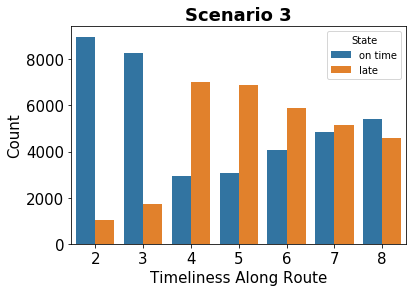

In [40]:
#call function
stop_state_data = each_stop_count(A12, A23, A34, A45, A56, A67, A78, A89, A910, A1011, A111)

#only show stops 2-8
stop_state_data = stop_state_data[stop_state_data.Stop.isin([2,3,4,5,6,7,8])]

#countplot
p = sns.countplot(x='Stop', hue='State', data=stop_state_data, order=[2,3,4,5,6,7,8], hue_order=['on time','late'])
p.axes.set_title('Scenario 3', fontsize=18, fontweight='bold')
p.set_xlabel('Timeliness Along Route',fontsize=15)
p.set_ylabel('Count',fontsize=15)
p.tick_params(labelsize=15)

plt.savefig('q2s3', bbox_inches='tight')
plt.show()

### Scenario 4:
$A_{i,i+1}$ = $\begin{bmatrix} 0 & 1 & 0 \\ 0 & .9 & .1 \\ 0 & .2 & .8 \end{bmatrix}$ 

EXCEPT

$A_{3,4}$ = $A_{4,5}$ = $\begin{bmatrix} 0 & .4 & .6 \\ 0 & .4 & .6 \\ 0 & .4 & .6 \end{bmatrix}$ 

**Set up matrices:**

In [41]:
#each bus stop
A34 = A45 = np.array([[0,.4,.6], 
                      [0,.4,.6], 
                      [0,.4,.6]])
A12 = A23 = A56 = A67 = A78 = A89 = A910 = A1011 = A111 = np.array(([[0,1,0], 
                                                                     [0,.9,.1], 
                                                                     [0,.2,.8]]))
#full bus route
m0 = np.zeros((3,3))
A = np.block([[m0,A12,m0,m0,m0,m0,m0,m0,m0,m0,m0], 
              [m0,m0,A23,m0,m0,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,A34,m0,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,A45,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,A56,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,A67,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,A78,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,A89,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,m0,A910,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,m0,m0,A1011], 
              [A111,m0,m0,m0,m0,m0,m0,m0,m0,m0,m0]])

**Find states of each stop for simulations of many full routes:**

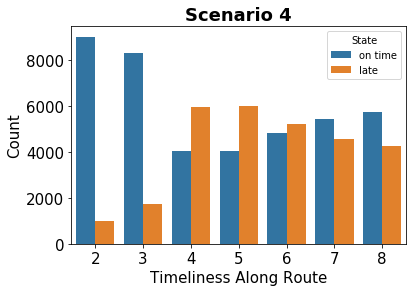

In [42]:
#call function
stop_state_data = each_stop_count(A12, A23, A34, A45, A56, A67, A78, A89, A910, A1011, A111)

#only show stops 2-8
stop_state_data = stop_state_data[stop_state_data.Stop.isin([2,3,4,5,6,7,8])]

#countplot
p = sns.countplot(x='Stop', hue='State', data=stop_state_data, order=[2,3,4,5,6,7,8], hue_order=['on time','late'])
p.axes.set_title('Scenario 4', fontsize=18, fontweight='bold')
p.set_xlabel('Timeliness Along Route',fontsize=15)
p.set_ylabel('Count',fontsize=15)
p.tick_params(labelsize=15)

plt.savefig('q2s4', bbox_inches='tight')
plt.show()

### Scenario 5:
$A_{i,i+1}$ = $\begin{bmatrix} 0 & 1 & 0 \\ 0 & .9 & .1 \\ 0 & .2 & .8 \end{bmatrix}$ 

EXCEPT

$A_{3,4}$ = $A_{4,5}$ = $\begin{bmatrix} 0 & .5 & .5 \\ 0 & .5 & .5 \\ 0 & .5 & .5 \end{bmatrix}$ 

**Set up matrices:**

In [43]:
#each bus stop
A34 = A45 = np.array([[0,.5,.5], 
                      [0,.5,.5], 
                      [0,.5,.5]])
A12 = A23 = A56 = A67 = A78 = A89 = A910 = A1011 = A111 = np.array(([[0,1,0], 
                                                                     [0,.9,.1], 
                                                                     [0,.2,.8]]))
#full bus route
m0 = np.zeros((3,3))
A = np.block([[m0,A12,m0,m0,m0,m0,m0,m0,m0,m0,m0], 
              [m0,m0,A23,m0,m0,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,A34,m0,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,A45,m0,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,A56,m0,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,A67,m0,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,A78,m0,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,A89,m0,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,m0,A910,m0],
              [m0,m0,m0,m0,m0,m0,m0,m0,m0,m0,A1011], 
              [A111,m0,m0,m0,m0,m0,m0,m0,m0,m0,m0]])

**Find states of each stop for simulations of many full routes:**

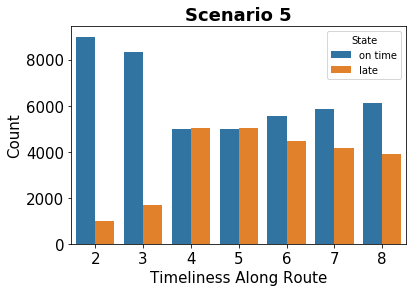

In [44]:
#call function
stop_state_data = each_stop_count(A12, A23, A34, A45, A56, A67, A78, A89, A910, A1011, A111)

#only show stops 2-8
stop_state_data = stop_state_data[stop_state_data.Stop.isin([2,3,4,5,6,7,8])]

#countplot
p = sns.countplot(x='Stop', hue='State', data=stop_state_data, order=[2,3,4,5,6,7,8], hue_order=['on time','late'])
p.axes.set_title('Scenario 5', fontsize=18, fontweight='bold')
p.set_xlabel('Timeliness Along Route',fontsize=15)
p.set_ylabel('Count',fontsize=15)
p.tick_params(labelsize=15)

plt.savefig('q2s5', bbox_inches='tight')
plt.show()